<a href="https://colab.research.google.com/github/rkaur050/core-ML-implementations/blob/main/pre_pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#getting independent and dependent features
X=df.iloc[:,:-1]
y=iris.target

In [6]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [63]:
#pre-pruning
parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
cv=GridSearchCV(tree_model,param_grid=parameters,cv=5,scoring='accuracy')

In [66]:
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [68]:
y_pred=cv.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,classification_report

In [73]:
score=accuracy_score(y_pred,y_test)

In [74]:
print('Accuracy Sore:',score)

Accuracy Sore: 0.96


In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.88      0.94        17
           2       0.94      1.00      0.97        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



[Text(0.4230769230769231, 0.9, 'x[0] <= 5.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.15384615384615385, 0.7, 'x[2] <= 2.45\ngini = 0.323\nsamples = 36\nvalue = [29, 6, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.23076923076923078, 0.5, 'x[3] <= 1.6\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6923076923076923, 0.7, 'x[2] <= 4.75\ngini = 0.528\nsamples = 64\nvalue = [2, 29, 33]'),
 Text(0.5384615384615384, 0.5, 'x[1] <= 3.6\ngini = 0.142\nsamples = 26\nvalue = [2, 24, 0]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 5.15\ngini = 0.229\nsamples = 38\nvalue = [0, 5, 33]'),
 Text(0.7692307692307693,

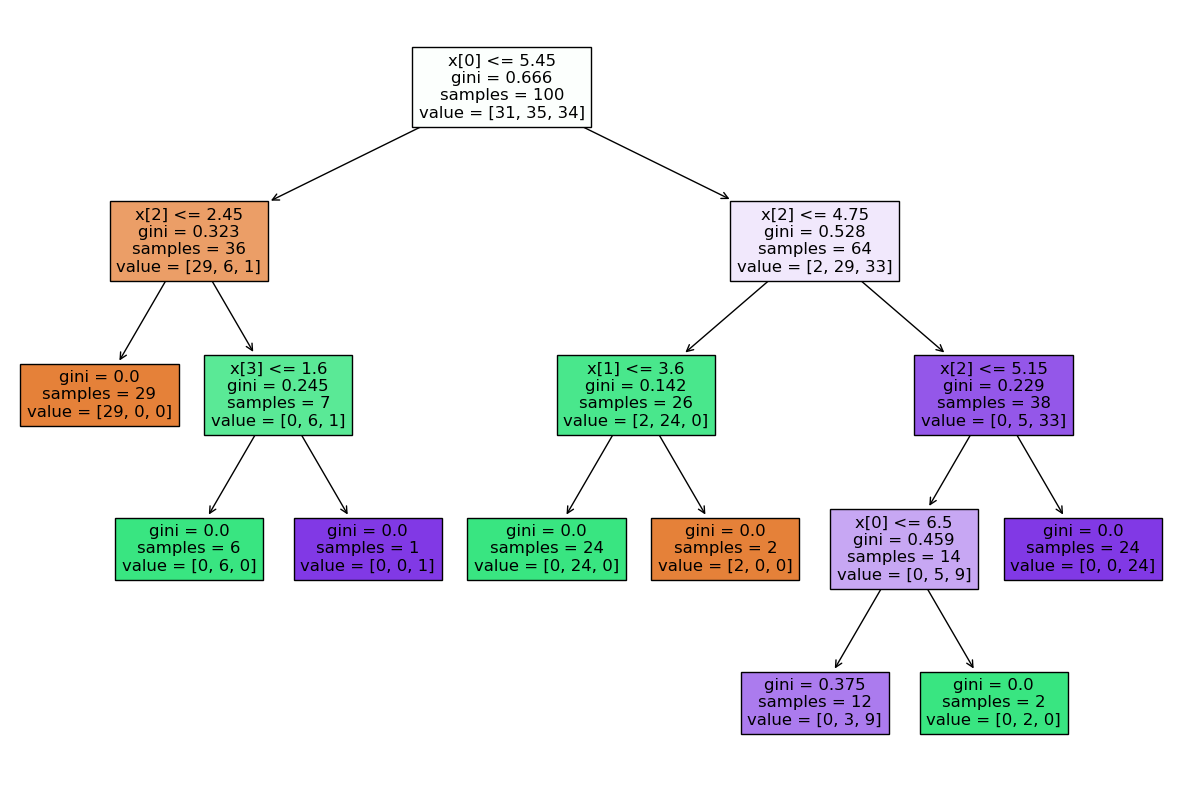

In [79]:
best_tree = cv.best_estimator_
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_tree,filled=True)